In [1]:
# libraries
# %matplotlib notebook
import os
import pandas as pd
import numpy as np
import json
import itertools
import matplotlib
import matplotlib.dates as md
import time
import datetime
from matplotlib import pyplot as plt
import torch as torch
import torch.nn as nn
import torch.optim as optim

<span style="font-size: 36px;"> ---------------</span>


<span style="font-size: 36px;"> **Data Visualisation**</span>


<span style="font-size: 36px;"> ---------------</span>

In [2]:
data = {}
path = './../NAB/data/'

def addFolderAndReadAll(f_name):
    data[f_name] = {}
    csvs = os.listdir(path + '/' + f_name)
    csvs_num = 0
    for csv in csvs:
        data[f_name][csv] = pd.read_csv(path + '/' + f_name + '/' + csv)
        csvs_num += 1
    return csvs_num

csvs_num = sum([addFolderAndReadAll(f_name) for f_name in os.listdir(path) if os.path.isdir(path + f_name)])

In [3]:
data['artificialWithAnomaly']['art_daily_nojump.csv']

timestamp      value
0     2014-04-01 00:00:00  21.598011
1     2014-04-01 00:05:00  19.321392
2     2014-04-01 00:10:00  21.399938
3     2014-04-01 00:15:00  18.373916
4     2014-04-01 00:20:00  18.167499
...                   ...        ...
4027  2014-04-14 23:35:00  18.379705
4028  2014-04-14 23:40:00  19.383839
4029  2014-04-14 23:45:00  21.423756
4030  2014-04-14 23:50:00  21.851140
4031  2014-04-14 23:55:00  18.969085

[4032 rows x 2 columns]

In [4]:
with open('./../NAB/labels/combined_windows.json', 'r') as file:
    labels = json.load(file)

In [5]:
for tt in data:
    print(tt)
        
    print('---')
    for tt2 in data[tt]:
        print(tt2)
        
    print('---')
    

realTraffic
---
speed_7578.csv
TravelTime_387.csv
TravelTime_451.csv
occupancy_t4013.csv
speed_6005.csv
occupancy_6005.csv
speed_t4013.csv
---
realAdExchange
---
exchange-2_cpm_results.csv
exchange-3_cpm_results.csv
exchange-3_cpc_results.csv
exchange-2_cpc_results.csv
exchange-4_cpm_results.csv
exchange-4_cpc_results.csv
---
realTweets
---
Twitter_volume_AMZN.csv
Twitter_volume_KO.csv
Twitter_volume_CRM.csv
Twitter_volume_PFE.csv
Twitter_volume_CVS.csv
Twitter_volume_AAPL.csv
Twitter_volume_FB.csv
Twitter_volume_IBM.csv
Twitter_volume_UPS.csv
Twitter_volume_GOOG.csv
---
artificialWithAnomaly
---
art_load_balancer_spikes.csv
art_daily_nojump.csv
art_daily_jumpsdown.csv
art_daily_flatmiddle.csv
art_increase_spike_density.csv
art_daily_jumpsup.csv
---
artificialNoAnomaly
---
art_daily_no_noise.csv
art_daily_perfect_square_wave.csv
art_flatline.csv
art_daily_small_noise.csv
art_noisy.csv
---
realAWSCloudwatch
---
rds_cpu_utilization_e47b3b.csv
ec2_cpu_utilization_53ea38.csv
ec2_network_in

In [6]:
for key1 in data:
    for key2 in data[key1]:
        one_csv_labels = labels[key1+'/'+key2]
        data[key1][key2]['interval'] = np.array(0)
        num = 0
        for interval in one_csv_labels:
            index1 = list(data[key1][key2]['timestamp']).index(interval[0][:19])
            index2 = list(data[key1][key2]['timestamp']).index(interval[1][:19])
            data[key1][key2]['interval'][num] = slice(index1, index2)
            num   += 1

/tmp/ipykernel_6492/3157086169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[key1][key2]['interval'][num] = slice(index1, index2)
/tmp/ipykernel_6492/3157086169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[key1][key2]['interval'][num] = slice(index1, index2)
/tmp/ipykernel_6492/3157086169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[key1][key2]['interval'][num] = slice(index1, index2)
/tmp/ipykernel_6

In [7]:
for key1 in data:
    for key2 in data[key1]:
        one_csv_labels = labels[key1 + '/' + key2]

        # Create an anomaly column initialized to 0 (no anomaly)
        data[key1][key2]['anomaly'] = 0

        for interval in one_csv_labels:
            # Using pandas to directly get the indices
            index1 = data[key1][key2][data[key1][key2]['timestamp'] == interval[0][:19]].index[0]
            index2 = data[key1][key2][data[key1][key2]['timestamp'] == interval[1][:19]].index[0]

            # Mark rows as anomalous
            data[key1][key2].loc[index1:index2, 'anomaly'] = 1


In [8]:
data['realTweets']['Twitter_volume_GOOG.csv'].columns

Index(['timestamp', 'value', 'interval', 'anomaly'], dtype='object')

In [9]:
data[key1][key2]['labels'] = np.zeros(np.shape(data[key1][key2]['interval']))
for i in data[key1][key2]['interval']:
    if isinstance(i, slice):
        data[key1][key2]['labels'][i] = 1
    else:
        break

/tmp/ipykernel_6492/1100460689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[key1][key2]['labels'][i] = 1


In [10]:

def convert_to_unix_timestamp(series):
    return pd.to_datetime(series).apply(lambda x: time.mktime(x.timetuple()))




string  = data[key1][key2]['timestamp'][1]

element = time.mktime(datetime.datetime.strptime(string,"%Y-%m-%d %H:%M:%S").timetuple())

In [11]:
convert_to_unix_timestamp(data[key1][key2]['timestamp'])

0       1.372885e+09
1       1.372889e+09
2       1.372892e+09
3       1.372896e+09
4       1.372900e+09
            ...     
7262    1.401264e+09
7263    1.401268e+09
7264    1.401271e+09
7265    1.401275e+09
7266    1.401278e+09
Name: timestamp, Length: 7267, dtype: float64

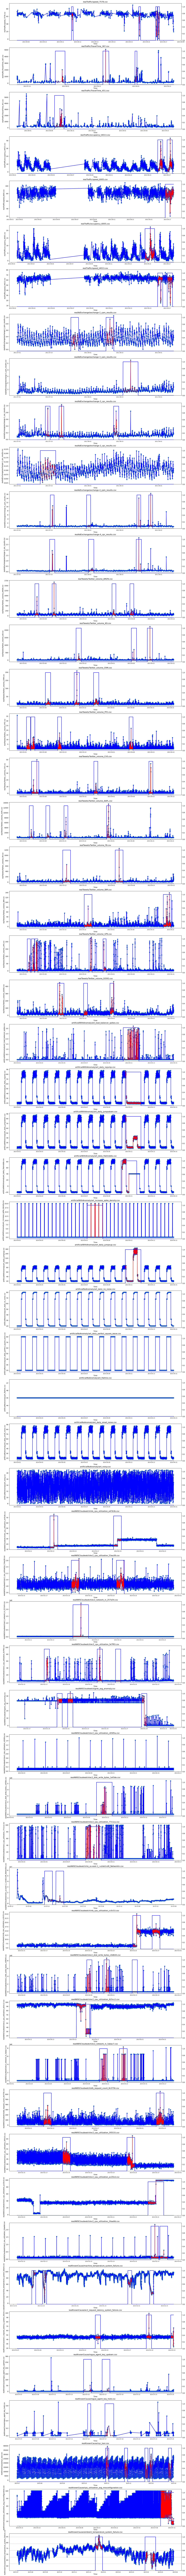

In [12]:
fig = plt.figure(figsize=(20, 300))

num = 0
for key1 in data:
    for key2 in data[key1]:
        num += 1      
        
        y = data[key1][key2]['value']
        x = pd.to_datetime(data[key1][key2]['timestamp'])
        
        ax = fig.add_subplot(csvs_num,1,num)
        
        ax.title.set_text(key1+'/'+key2)
        ax.set_xlabel('Time')
        ax.set_ylabel(key1+'/'+key2)
        plt.setp(ax.get_xticklabels(), size=8)
        ax.plot(x, y, 'b-', linewidth=2)
        
        ax2 = ax.twinx()
        yi = data[key1][key2]['anomaly']
        ax2.plot(x, yi, 'b-', linewidth=2)
        ax2.set_ylim(0,1.1)
        i = 0
        
        while data[key1][key2]['interval'][i] != 0:
            bold = data[key1][key2]['interval'][i]
            ax.plot(x[bold], y[bold], 'r-', linewidth=1)
            i += 1
        ax.scatter(x, y)

plt.grid()
plt.show()

<span style="font-size: 36px;"> ---------------</span>


<span style="font-size: 36px;"> **DATA PROCESS**</span>


<span style="font-size: 36px;"> ---------------</span>

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

import pandas as pd
from sklearn.preprocessing import StandardScaler


class TimeSeriesPreprocessor:
    
    def __init__(self, dataframe):
        self.data = dataframe.copy()
        self.timestamp_col = self.data.columns[0]
        self.value_col = self.data.columns[1]
        
    def handle_missing_values(self, strategy="mean"):
        # Introduce the 'validity_flag' column
        self.data['validity_flag'] = 1
        self.data.loc[self.data[self.value_col].isnull(), 'validity_flag'] = 0

        if strategy == "drop":
            self.data.dropna(inplace=True)
        elif strategy == "mean":
            self.data[self.value_col].fillna(self.data[self.value_col].mean(), inplace=True)
        elif strategy == "ffill":
            self.data.fillna(method="ffill", inplace=True)
        elif strategy == "bfill":
            self.data.fillna(method="bfill", inplace=True)
        else:
            raise ValueError("Invalid strategy selected for handling missing values.")
        
    def convert_to_datetime(self):
        self.data[self.timestamp_col] = pd.to_datetime(self.data[self.timestamp_col])
        
    def resample_data(self, frequency):
        self.data.set_index(self.timestamp_col, inplace=True)
        self.data = self.data.resample(frequency).ffill()
        
    def normalize_data(self):
        scaler = StandardScaler()
        self.data[f"{self.value_col}_normalized"] = scaler.fit_transform(self.data[[self.value_col]])
        
    def feature_engineering(self, window_size=10):
        self.data['rolling_mean'] = self.data[f"{self.value_col}_normalized"].rolling(window=window_size).mean()
        self.data['rolling_std'] = self.data[f"{self.value_col}_normalized"].rolling(window=window_size).std()
        
    def preprocess(self):
        # Example preprocessing steps
        self.handle_missing_values()
        self.convert_to_datetime()
        self.resample_data('5T')  # Resample to 5 minutes as an example
        self.normalize_data()
        self.feature_engineering()
        
    def get_preprocessed_data(self):
        return self.data
    
# Usage example:
temp_data = data['realTweets']['Twitter_volume_GOOG.csv']
preprocessor = TimeSeriesPreprocessor(temp_data)
preprocessor.preprocess()
processed_data = preprocessor.get_preprocessed_data()


<span style="font-size: 36px;"> ---------------</span>


<span style="font-size: 36px;"> **Prototype Model**</span>


<span style="font-size: 36px;"> ---------------</span>

In [ ]:



# Assuming you have a dataset like this
# features = [...]
# labels = [0, 1, ...]  # 0 for normal, 1 for anomaly

# Prepare your data



train_data   =  #torch.tensor(train_features, dtype=torch.float32)
train_labels =  #torch.tensor(train_labels, dtype=torch.float32)
test_data    =  #torch.tensor(test_features, dtype=torch.float32)
test_labels  =  #torch.tensor(test_labels, dtype=torch.float32)

for key1 in data:
    for key2 in data[key1]:
        num += 1      
        if num < 4:
            y     = data[key1][key2]['value']
            x     = convert_to_unix_timestamp(data[key1][key2]['timestamp'])
            t_label = data[key1][key2]['anomaly']

            train_data.add(x,y)
            train_labels.add(t_label)
        else:
            y     = data[key1][key2]['value']
            x     = convert_to_unix_timestamp(data[key1][key2]['timestamp'])
            t_label = data[key1][key2]['anomaly']

            test_data.add(x,y)
            test_labels.add(t_label)            
        




In [106]:

# Lists to collect the data
train_features = []
train_labels = []
test_features = []
test_labels = []

# Counter to determine whether to add to train or test
num = 0

for key1 in data:
    for key2 in data[key1]:
        num += 1

        # Convert individual timestamp to UNIX
        x = convert_to_unix_timestamp(data[key1][key2]['timestamp'])

        # Get value and label
        y = data[key1][key2]['value']
        t_label = data[key1][key2]['anomaly']

        # Check where to append
        if num <= 4:
            train_features.extend((x.tolist(), y.tolist()))
            train_labels.extend(t_label.tolist())
        elif num <= 6:
            test_features.extend([x, y])
            test_labels.extend(t_label.tolist())

# Convert lists to tensors
# train_data = torch.tensor(train_features, dtype=torch.float32)
# train_labels = torch.tensor(train_labels, dtype=torch.float32)
# test_data = torch.tensor(test_features, dtype=torch.float32)
# test_labels = torch.tensor(test_labels, dtype=torch.float32)


In [95]:
# Lists to collect the data
train_features = []
train_labels = []
test_features = []
test_labels = []

# Counter to determine whether to add to train or test
num = 0


for key1 in data:
    for key2 in data[key1]:
        num += 1

        # Convert individual timestamp to UNIX
        x = convert_to_unix_timestamp(data[key1][key2]['timestamp'])
        # Get value and label
        y = data[key1][key2]['value']
        t_label = data[key1][key2]['anomaly']

        # convert to lists
        x.tolist(); y.tolist(); t_label.tolist();


        # FIRST HALF IS TRAINING
        train_features.append([x[:int(len(x)/2)], y[:int(len(x)/2)]])
        train_labels.append(t_label[:int(len(x)/2)])

        # SECOND HALF IS TRAINING
        test_features.append([x[int(len(x)/2):], y[int(len(x)/2):]])
        test_labels.append(t_label[int(len(x)/2):])


In [99]:

def set_assigner(tag):
    # tag is the `num` or element from the sets to pick and convert data to tensors
    
    # Convert list of Series to numpy array
    train_features_array = np.stack(train_features[tag]).astype(np.float32)
    test_features_array = np.stack(test_features[tag]).astype(np.float32)

    # Convert numpy arrays to PyTorch tensors
    train_feature_tensor = torch.from_numpy(train_features_array)
    test_feature_tensor = torch.from_numpy(test_features_array)
    
    # Convert list of Series to numpy array
    train_labels_array = np.stack(train_labels[tag]).astype(np.float32)
    test_labels_array  = np.stack(test_labels[tag]).astype(np.float32)

    # Convert numpy arrays to PyTorch tensors
    train_labels_tensor = torch.from_numpy(train_labels_array)
    test_labels_tensor = torch.from_numpy(test_labels_array)
    return train_feature_tensor,test_feature_tensor,train_labels_tensor,test_labels_tensor


In [103]:
train_feature,test_feature,train_label,test_label = set_assigner(0)

print(np.shape(train_feature),np.shape(train_label))

torch.Size([2, 563]) torch.Size([563])


In [101]:



class BDT(nn.Module):
    def __init__(self, input_size):
        super(BDT, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Assuming data has 10 features
model = BDT(2)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_feature)
    loss = criterion(outputs, train_label)
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(test_data)
    test_outputs = (test_outputs > 0.5).float()
    accuracy = (test_outputs == test_labels).float().mean()
    print(f"Accuracy: {accuracy:.2f}")



RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x563 and 2x1)

In [104]:
# ... [rest of the code]

# Assuming data has 2 features
model = BDT(2)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Transpose train_feature to make it [563, 2]
train_feature_t = train_feature.transpose(0, 1)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_feature_t)
    loss = criterion(outputs, train_label)
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# Transpose test_feature as well for evaluation
test_feature_t = test_feature.transpose(0, 1)

# Evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(test_feature_t)
    test_outputs = (test_outputs > 0.5).float()
    accuracy = (test_outputs == test_label).float().mean()  # Make sure it's "test_label" and not "test_labels"
    print(f"Accuracy: {accuracy:.2f}")


ValueError: Using a target size (torch.Size([563])) that is different to the input size (torch.Size([563, 1])) is deprecated. Please ensure they have the same size.